In [1]:
"""
This script includes the main part for Columbia ECBM 4040 final project: 
1. prepare part 
2. run the algorithm for one single picture
3. run the algorithn for the video

Date:
12/17/2017
"""
# import necessary libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
from os.path import exists
from sys import stdout
import importlib
from art_transfer import transfer_art
import math
from PIL import Image



def print_losses(losses):
    """
     use the stdout to print the lossess of content/ style/ total variation/ total
     Parameters
     ----------
     lossess : dict
        the dictionary stored the results
    """
    stdout.write('  content loss: %g\n' % losses['content'])
    stdout.write('    style loss: %g\n' % losses['art'])
    stdout.write('       tv loss: %g\n' % losses['total_variation'])
    stdout.write('    total loss: %g\n' % losses['total'])

def imread(path):
    """
     read the image

     Parameters
     ----------
     path : str
         the path of the image
     Returns
     -------
      np.array
      the rgb representation of the image
    """
    return scipy.misc.imread(path).astype(np.float)


def imsave(path, img):
    """
    save the image to path

     Parameters
     ----------
     path : str
         the path to store the image
     img: np.array
         the image to be saved
    """
    img = np.clip(img, 0, 255).astype(np.uint8)
    scipy.misc.imsave(path, img)
    
def load_image(image_path):
    """
     load the image from image path

     Parameters
     ----------
     image_path : str
        the path of the image to be loaded
     Returns
     -------
      the image
     Raises
     ------
     AssertionError
    """
    assert exists(image_path), "image {} does not exist".format(image_path)
    img = imread(image_path)
    img = img.astype("float32")
    desire_shape = (1,) + img.shape
    img = np.ndarray.reshape(img, desire_shape)
    return img

In [2]:
# input parameters
CONTENT_WEIGHT = 5e1
STYLE_WEIGHT = 5e2
TV_WEIGHT = 1e2
LEARNING_RATE = 1e1
ITERATIONS = 500
VGG_PATH = 'imagenet-vgg-verydeep-19.mat'

initial = None
USE_GPU = True
CHECKPOINT_ITERATIONS = 1
device = '/gpu:0' if USE_GPU else '/cpu:0'

### Transfer single picture

In [15]:
# input of one single picture
OUTPUT = "../data/img/vangogh_painted_dog.png"
CONTENT = "../data/img/dog.png"
STYLE = "../data/img/vangogh.png"

# read  the content and style image
content_image = load_image(CONTENT)
style_image  = load_image(STYLE)

# use the transfer_art class we wrote to transfer class
style_transfer = transfer_art(
vgg_path=VGG_PATH,
content=content_image,
art=style_image,
content_weight= CONTENT_WEIGHT,
art_weight= STYLE_WEIGHT,
tv_weight= STYLE_WEIGHT,
initial=initial,
gpu_device=device)

# create list to record how loss changes as training proceed
content_loss_recorder = []
style_loss_recorder = []
total_vi_loss_recorder = []
total_loss_recorder = []

for iteration, image, losses in style_transfer.train(
    learning_rate = LEARNING_RATE,
    iterations= ITERATIONS,
    checkpoint_iterations= CHECKPOINT_ITERATIONS):
    
    print_losses(losses)
    # record loss to  further plot how it changes:
    content_loss_recorder.append(losses['content'])
    style_loss_recorder.append(losses['art'])
    total_vi_loss_recorder.append(losses['total_variation'])
    total_loss_recorder.append(losses['total'])
    #save the output image
    output_file = None
    if iteration is None:
        imsave(OUTPUT, image)

Iteration 1/500
  content loss: 1.74432e+07
    style loss: 9.48736e+07
       tv loss: 95776.7
    total loss: 1.12413e+08
Iteration 2/500
  content loss: 1.70788e+07
    style loss: 5.85925e+07
       tv loss: 214819
    total loss: 7.58861e+07
Iteration 3/500
  content loss: 1.98941e+07
    style loss: 6.14886e+07
       tv loss: 353750
    total loss: 8.17365e+07
Iteration 4/500
  content loss: 1.77305e+07
    style loss: 5.44774e+07
       tv loss: 404446
    total loss: 7.26124e+07
Iteration 5/500
  content loss: 1.65167e+07
    style loss: 4.6236e+07
       tv loss: 460515
    total loss: 6.32133e+07
Iteration 6/500
  content loss: 1.63386e+07
    style loss: 4.04951e+07
       tv loss: 528873
    total loss: 5.73625e+07
Iteration 7/500
  content loss: 1.66925e+07
    style loss: 3.75106e+07
       tv loss: 601574
    total loss: 5.48047e+07
Iteration 8/500
  content loss: 1.67226e+07
    style loss: 3.24568e+07
       tv loss: 664597
    total loss: 4.98439e+07
Iteration 9/500


  content loss: 9.4051e+06
    style loss: 2.03724e+06
       tv loss: 506507
    total loss: 1.19488e+07
Iteration 69/500
  content loss: 9.37451e+06
    style loss: 1.99718e+06
       tv loss: 504319
    total loss: 1.1876e+07
Iteration 70/500
  content loss: 9.33133e+06
    style loss: 1.9726e+06
       tv loss: 502138
    total loss: 1.18061e+07
Iteration 71/500
  content loss: 9.28896e+06
    style loss: 1.95061e+06
       tv loss: 499917
    total loss: 1.17395e+07
Iteration 72/500
  content loss: 9.30455e+06
    style loss: 1.87307e+06
       tv loss: 498099
    total loss: 1.16757e+07
Iteration 73/500
  content loss: 9.25511e+06
    style loss: 1.86429e+06
       tv loss: 495888
    total loss: 1.16153e+07
Iteration 74/500
  content loss: 9.25471e+06
    style loss: 1.80825e+06
       tv loss: 494246
    total loss: 1.15572e+07
Iteration 75/500
  content loss: 9.1597e+06
    style loss: 1.85367e+06
       tv loss: 491822
    total loss: 1.15052e+07
Iteration 76/500
  content lo

  content loss: 8.36949e+06
    style loss: 1.28939e+06
       tv loss: 401173
    total loss: 1.006e+07
Iteration 135/500
  content loss: 8.46819e+06
    style loss: 1.18783e+06
       tv loss: 400993
    total loss: 1.0057e+07
Iteration 136/500
  content loss: 8.32152e+06
    style loss: 1.3396e+06
       tv loss: 398709
    total loss: 1.00598e+07
Iteration 137/500
  content loss: 8.48215e+06
    style loss: 1.17736e+06
       tv loss: 399121
    total loss: 1.00586e+07
Iteration 138/500
  content loss: 8.28522e+06
    style loss: 1.38027e+06
       tv loss: 396414
    total loss: 1.00619e+07
Iteration 139/500
  content loss: 8.47028e+06
    style loss: 1.17618e+06
       tv loss: 397309
    total loss: 1.00438e+07
Iteration 140/500
  content loss: 8.29294e+06
    style loss: 1.33231e+06
       tv loss: 394773
    total loss: 1.002e+07
Iteration 141/500
  content loss: 8.41006e+06
    style loss: 1.18129e+06
       tv loss: 395087
    total loss: 9.98643e+06
Iteration 142/500
  cont

  content loss: 8.1416e+06
    style loss: 1.15115e+06
       tv loss: 356281
    total loss: 9.64903e+06
Iteration 201/500
  content loss: 7.96855e+06
    style loss: 1.34026e+06
       tv loss: 354247
    total loss: 9.66306e+06
Iteration 202/500
  content loss: 8.19159e+06
    style loss: 1.17121e+06
       tv loss: 355908
    total loss: 9.71871e+06
Iteration 203/500
  content loss: 7.86587e+06
    style loss: 1.66555e+06
       tv loss: 352679
    total loss: 9.88409e+06
Iteration 204/500
  content loss: 8.29779e+06
    style loss: 1.30495e+06
       tv loss: 356861
    total loss: 9.95961e+06
Iteration 205/500
  content loss: 7.78893e+06
    style loss: 1.92288e+06
       tv loss: 351487
    total loss: 1.00633e+07
Iteration 206/500
  content loss: 8.23485e+06
    style loss: 1.19558e+06
       tv loss: 357555
    total loss: 9.78799e+06
Iteration 207/500
  content loss: 8.1207e+06
    style loss: 1.34062e+06
       tv loss: 356047
    total loss: 9.81737e+06
Iteration 208/500
  

  content loss: 7.86358e+06
    style loss: 1.25325e+06
       tv loss: 341151
    total loss: 9.45799e+06
Iteration 267/500
  content loss: 7.87326e+06
    style loss: 1.24334e+06
       tv loss: 341648
    total loss: 9.45825e+06
Iteration 268/500
  content loss: 7.88148e+06
    style loss: 1.22878e+06
       tv loss: 340364
    total loss: 9.45062e+06
Iteration 269/500
  content loss: 7.91035e+06
    style loss: 1.19706e+06
       tv loss: 340396
    total loss: 9.4478e+06
Iteration 270/500
  content loss: 7.83137e+06
    style loss: 1.27218e+06
       tv loss: 340094
    total loss: 9.44364e+06
Iteration 271/500
  content loss: 7.89774e+06
    style loss: 1.21208e+06
       tv loss: 339671
    total loss: 9.44949e+06
Iteration 272/500
  content loss: 7.8667e+06
    style loss: 1.25411e+06
       tv loss: 339005
    total loss: 9.45981e+06
Iteration 273/500
  content loss: 7.90278e+06
    style loss: 1.23496e+06
       tv loss: 339664
    total loss: 9.4774e+06
Iteration 274/500
  c

  content loss: 7.75551e+06
    style loss: 1.29749e+06
       tv loss: 333612
    total loss: 9.38662e+06
Iteration 333/500
  content loss: 7.69449e+06
    style loss: 1.36285e+06
       tv loss: 333377
    total loss: 9.39072e+06
Iteration 334/500
  content loss: 7.86619e+06
    style loss: 1.18622e+06
       tv loss: 332268
    total loss: 9.38468e+06
Iteration 335/500
  content loss: 7.81999e+06
    style loss: 1.21409e+06
       tv loss: 332408
    total loss: 9.36649e+06
Iteration 336/500
  content loss: 7.66148e+06
    style loss: 1.39316e+06
       tv loss: 332390
    total loss: 9.38704e+06
Iteration 337/500
  content loss: 7.82184e+06
    style loss: 1.19466e+06
       tv loss: 331905
    total loss: 9.34841e+06
Iteration 338/500
  content loss: 7.83372e+06
    style loss: 1.2074e+06
       tv loss: 330994
    total loss: 9.37212e+06
Iteration 339/500
  content loss: 7.69864e+06
    style loss: 1.32623e+06
       tv loss: 331403
    total loss: 9.35628e+06
Iteration 340/500
 

  content loss: 7.63366e+06
    style loss: 1.34045e+06
       tv loss: 320650
    total loss: 9.29476e+06
Iteration 399/500
  content loss: 7.79177e+06
    style loss: 1.19278e+06
       tv loss: 322318
    total loss: 9.30687e+06
Iteration 400/500
  content loss: 7.53363e+06
    style loss: 1.49493e+06
       tv loss: 319727
    total loss: 9.34829e+06
Iteration 401/500
  content loss: 7.90379e+06
    style loss: 1.18881e+06
       tv loss: 323068
    total loss: 9.41567e+06
Iteration 402/500
  content loss: 7.45335e+06
    style loss: 1.79297e+06
       tv loss: 318438
    total loss: 9.56475e+06
Iteration 403/500
  content loss: 7.97167e+06
    style loss: 1.33251e+06
       tv loss: 324700
    total loss: 9.62889e+06
Iteration 404/500
  content loss: 7.51012e+06
    style loss: 1.76533e+06
       tv loss: 319248
    total loss: 9.59469e+06
Iteration 405/500
  content loss: 7.79433e+06
    style loss: 1.24563e+06
       tv loss: 323572
    total loss: 9.36352e+06
Iteration 406/500


  content loss: 7.78541e+06
    style loss: 1.22408e+06
       tv loss: 322032
    total loss: 9.33153e+06
Iteration 465/500
  content loss: 7.83043e+06
    style loss: 1.31279e+06
       tv loss: 324939
    total loss: 9.46816e+06
Iteration 466/500
  content loss: 7.43922e+06
    style loss: 1.78042e+06
       tv loss: 321220
    total loss: 9.54086e+06
Iteration 467/500
  content loss: 7.81961e+06
    style loss: 1.18316e+06
       tv loss: 323555
    total loss: 9.32632e+06
Iteration 468/500
  content loss: 7.82138e+06
    style loss: 1.23705e+06
       tv loss: 325824
    total loss: 9.38426e+06
Iteration 469/500
  content loss: 7.47104e+06
    style loss: 1.64724e+06
       tv loss: 322236
    total loss: 9.44051e+06
Iteration 470/500
  content loss: 7.79652e+06
    style loss: 1.19116e+06
       tv loss: 324285
    total loss: 9.31196e+06
Iteration 471/500
  content loss: 7.82474e+06
    style loss: 1.21244e+06
       tv loss: 325766
    total loss: 9.36295e+06
Iteration 472/500


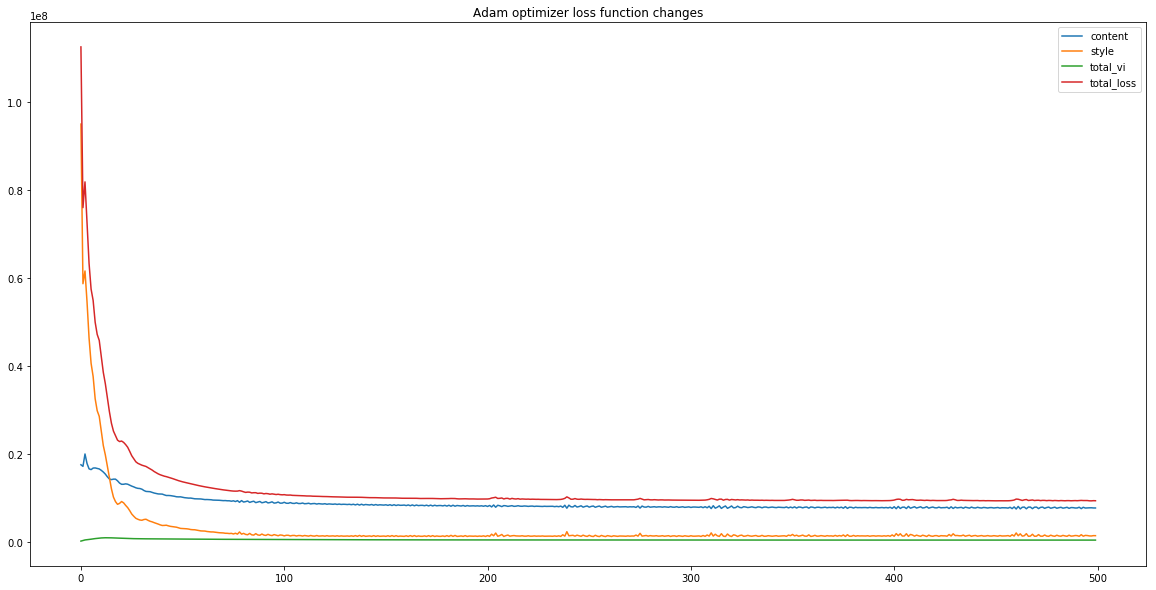

In [17]:
# to see how the loss changes as training proceed
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
start = 0
plt.title("Adam optimizer loss function changes")

plt.plot(content_loss_recorder[start:], label= "content")
plt.plot(style_loss_recorder[start:], label ="style")
plt.plot(total_vi_loss_recorder[start:], label = "total_vi")
plt.plot(total_loss_recorder[start:], label = "total_loss")
plt.legend()
plt.show()

### Video transfer

In [22]:
# read video using cv2 library
import cv2
vidcap = cv2.VideoCapture('../data/big_buck_bunny_720p_5mb.mp4')
success,image = vidcap.read()
count = 0
success = True
while success:
    success,image = vidcap.read()
    cv2.imwrite("../data/video/image%d.jpg"%i)     # save frame as JPEG file
    count += 1

In [19]:
# transfer the picture one by one 
for i in range(0,735,1):
    print(i)
    
    OUTPUT = "../data/video/image%d_output.png"%i
    CONTENT = "../data/video/image%d.jpg"%i
    STYLE = "../data/video/monet.jpg"
    # the exactaly same as before
    content_image = load_image(CONTENT)
    style_image  = load_image(STYLE)
    
    style_transfer = transfer_art(
    vgg_path=VGG_PATH,
    content=content_image,
    art=style_image,
    content_weight= CONTENT_WEIGHT,
    art_weight= STYLE_WEIGHT,
    tv_weight= STYLE_WEIGHT,
    initial=initial,
    gpu_device=device)
        
    for iteration, image, losses in style_transfer.train(
        learning_rate = LEARNING_RATE,
        iterations= ITERATIONS,
        checkpoint_iterations= CHECKPOINT_ITERATIONS):
        print_losses(losses)

        output_file = None
        if iteration is None:
            imsave(OUTPUT, image)

In [6]:
# change the output image to zip
import shutil
shutil.make_archive("output", 'zip', "output")

'/home/ecbm4040/style-transfer-master/style-transfer-master/output_pic_2.zip'

In [ ]:
# from picture to video
import cv2
import os

image_folder = 'output'
images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]

import imageio
with imageio.get_writer('movie.gif', mode='I') as writer:
    for filename in images:
        image = imageio.imread( "read_pics/" + filename)
        writer.append_data(image)